In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set aesthetic parameters
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [7]:
file_path = "dataset/salesdaily.csv"
df = pd.read_csv(file_path)

In [8]:
# Display basic information
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nColumn Data Types:")
print(df.dtypes)
print("\nSample Data:")
print(df.head())

Dataset Overview:
Shape: (2106, 13)

Column Data Types:
datum            object
M01AB           float64
M01AE           float64
N02BA           float64
N02BE           float64
N05B            float64
N05C            float64
R03             float64
R06             float64
Year              int64
Month             int64
Hour              int64
Weekday Name     object
dtype: object

Sample Data:
      datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       

In [9]:
# Check for missing values
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})
print("\nMissing Values:")
print(missing_data[missing_data['Missing Count'] > 0])


Missing Values:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [10]:
# Basic statistics for all drug quantities
drug_columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
print("\nDescriptive Statistics for Drug Quantities:")
print(df[drug_columns].describe().T)


Descriptive Statistics for Drug Quantities:
        count       mean        std  min    25%    50%     75%         max
M01AB  2106.0   5.033683   2.737579  0.0   3.00   4.99   6.670   17.340000
M01AE  2106.0   3.895830   2.133337  0.0   2.34   3.67   5.138   14.463000
N02BA  2106.0   3.880441   2.384010  0.0   2.00   3.50   5.200   16.000000
N02BE  2106.0  29.917095  15.590966  0.0  19.00  26.90  38.300  161.000000
N05B   2106.0   8.853627   5.605605  0.0   5.00   8.00  12.000   54.833333
N05C   2106.0   0.593522   1.092988  0.0   0.00   0.00   1.000    9.000000
R03    2106.0   5.512262   6.428736  0.0   1.00   4.00   8.000   45.000000
R06    2106.0   2.900198   2.415816  0.0   1.00   2.00   4.000   15.000000


In [11]:
# Convert date column to datetime if it's not already
if 'datum' in df.columns and df['datum'].dtype == 'object':
    try:
        df['datum'] = pd.to_datetime(df['datum'])
        print("\nConverted 'datum' column to datetime.")
    except:
        print("\nCould not convert 'datum' column to datetime. Using as is.")


Converted 'datum' column to datetime.



--- Time Series Analysis for Drug Quantities ---


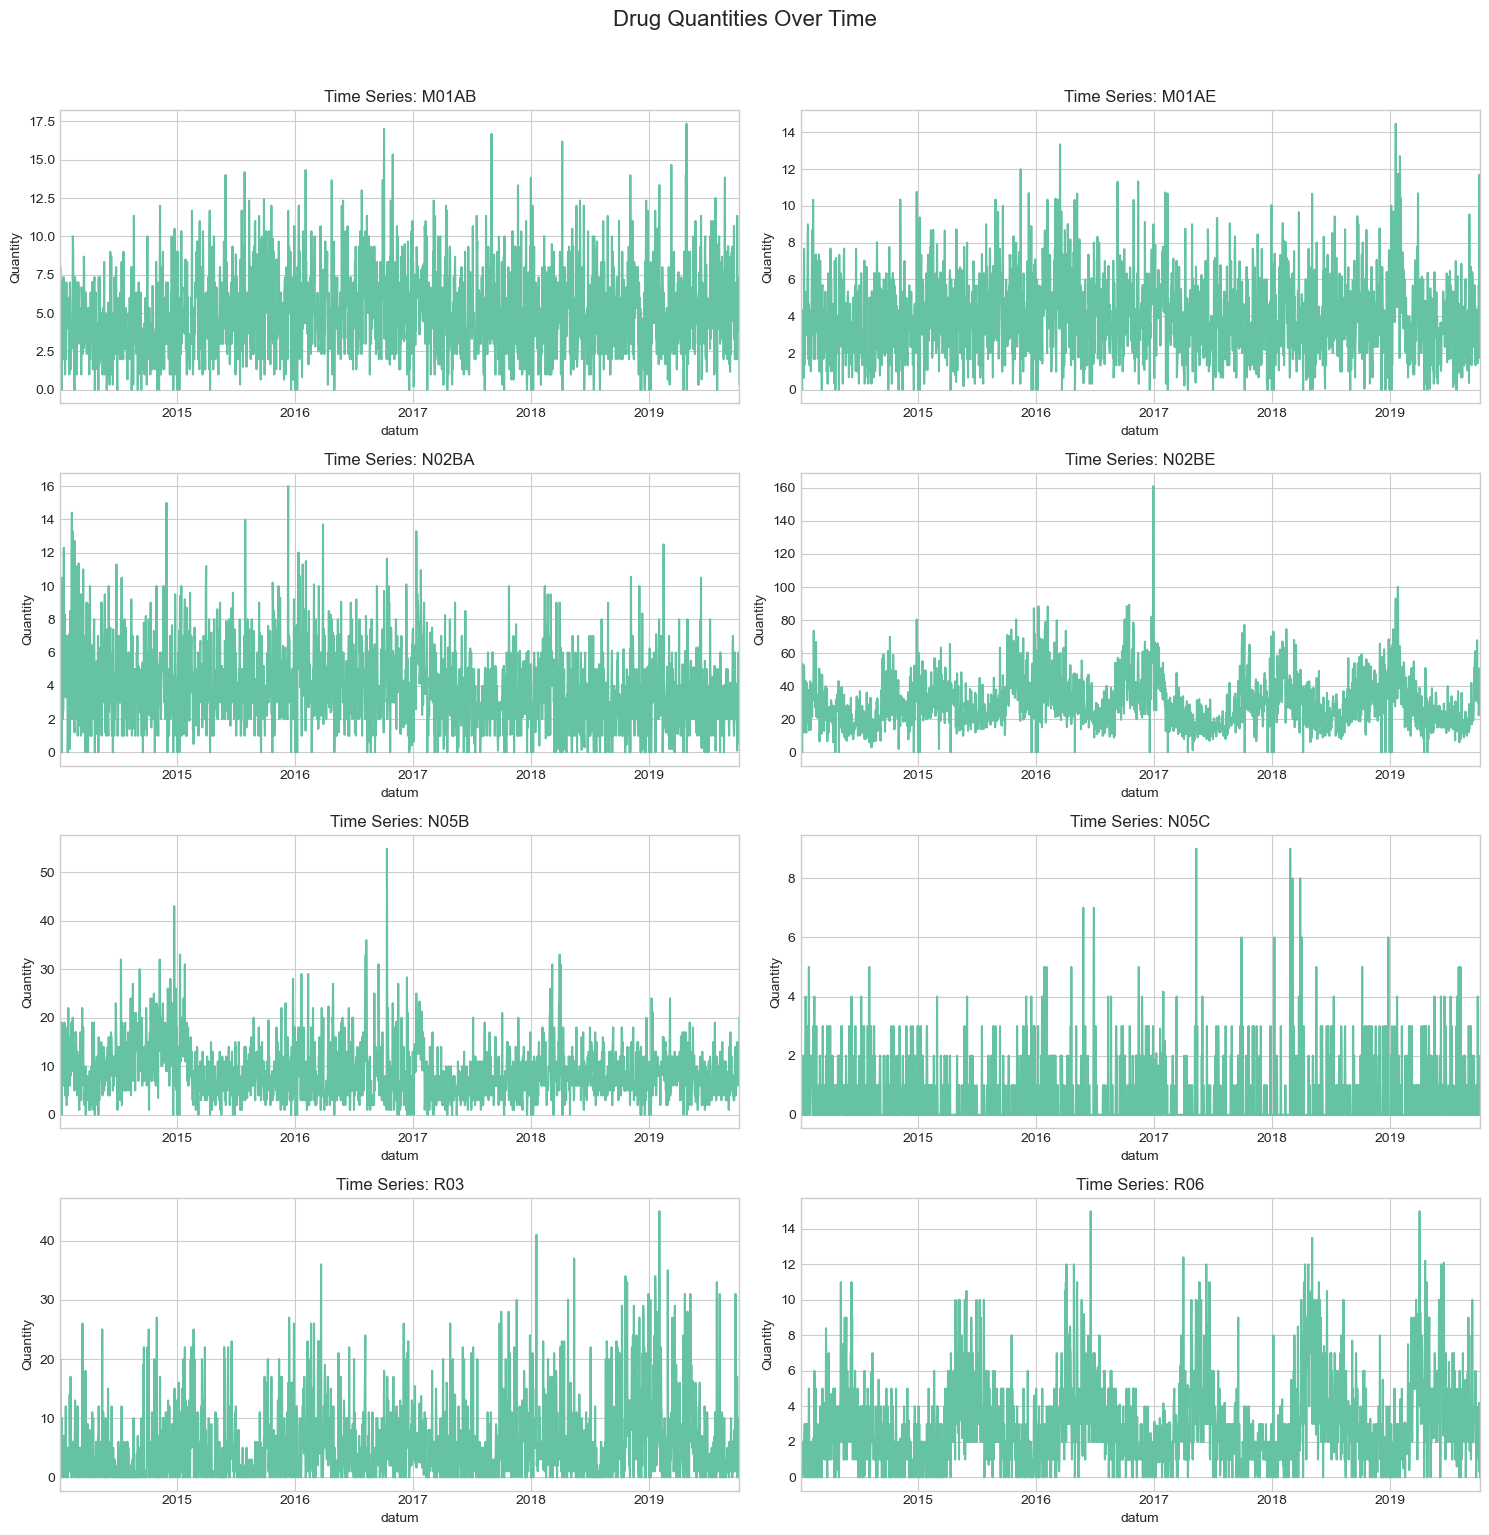

In [12]:
# Time Series Analysis for each drug category
print("\n--- Time Series Analysis for Drug Quantities ---")

# Check if date column exists and is in datetime format
has_datetime = False
if 'datum' in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df['datum']):
        has_datetime = True
    else:
        try:
            df['datum'] = pd.to_datetime(df['datum'])
            has_datetime = True
        except:
            pass

if has_datetime:
    # Set datum as index for time series analysis
    df_ts = df.set_index('datum')

    # Plot time series for each drug
    plt.figure(figsize=(15, 15))
    for i, drug in enumerate(drug_columns, 1):
        plt.subplot(4, 2, i)
        df_ts[drug].plot()
        plt.title(f'Time Series: {drug}')
        plt.ylabel('Quantity')
        plt.tight_layout()
    plt.suptitle('Drug Quantities Over Time', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

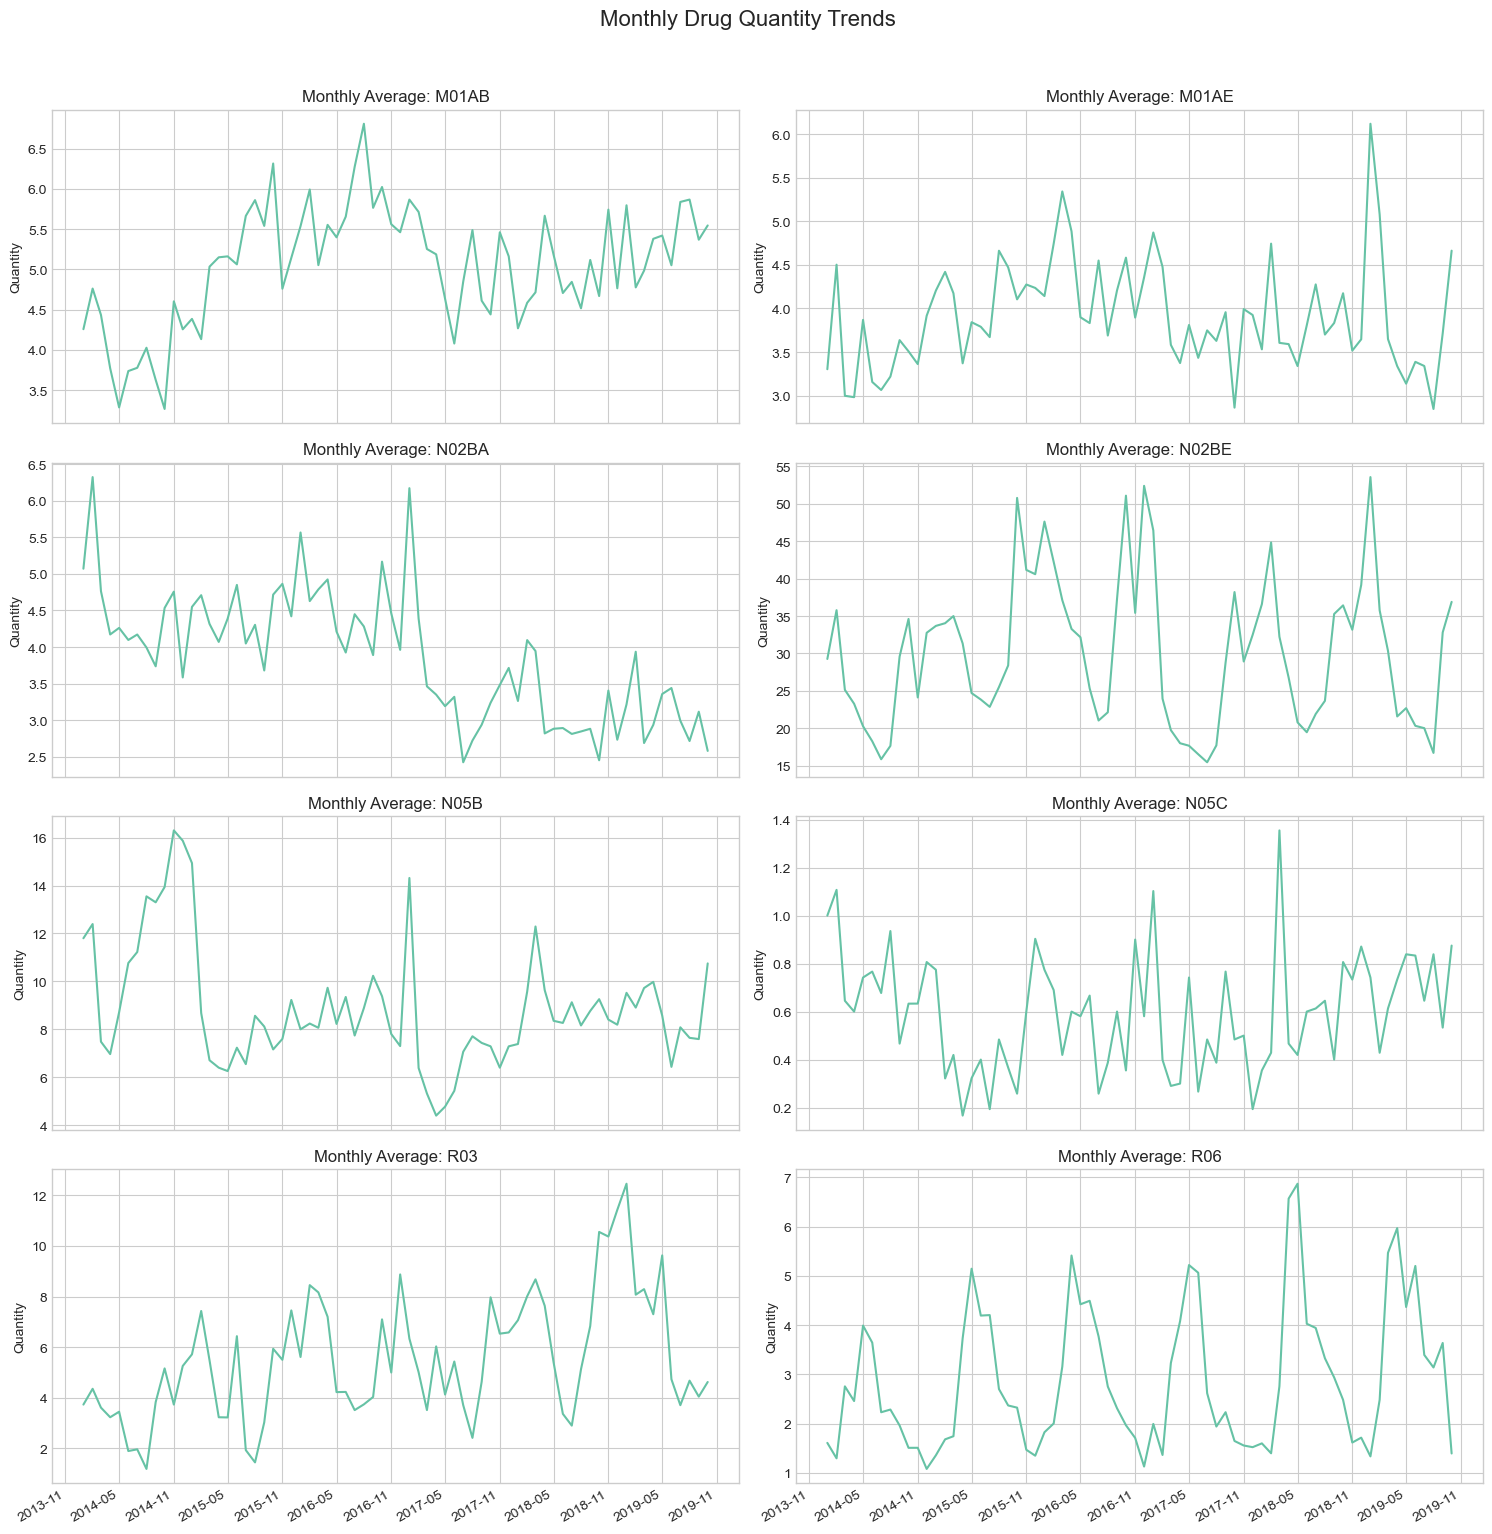

In [13]:
    # Monthly trends
    if 'Year' in df.columns and 'Month' in df.columns:
        # Aggregate by year and month
        monthly_data = df.groupby(['Year', 'Month'])[drug_columns].mean().reset_index()
        # Create a date column for better visualization
        monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(DAY=1))

        # Plot monthly trends
        plt.figure(figsize=(15, 15))
        for i, drug in enumerate(drug_columns, 1):
            plt.subplot(4, 2, i)
            plt.plot(monthly_data['Date'], monthly_data[drug])
            plt.title(f'Monthly Average: {drug}')
            plt.ylabel('Quantity')
            plt.gcf().autofmt_xdate()
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
        plt.suptitle('Monthly Drug Quantity Trends', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

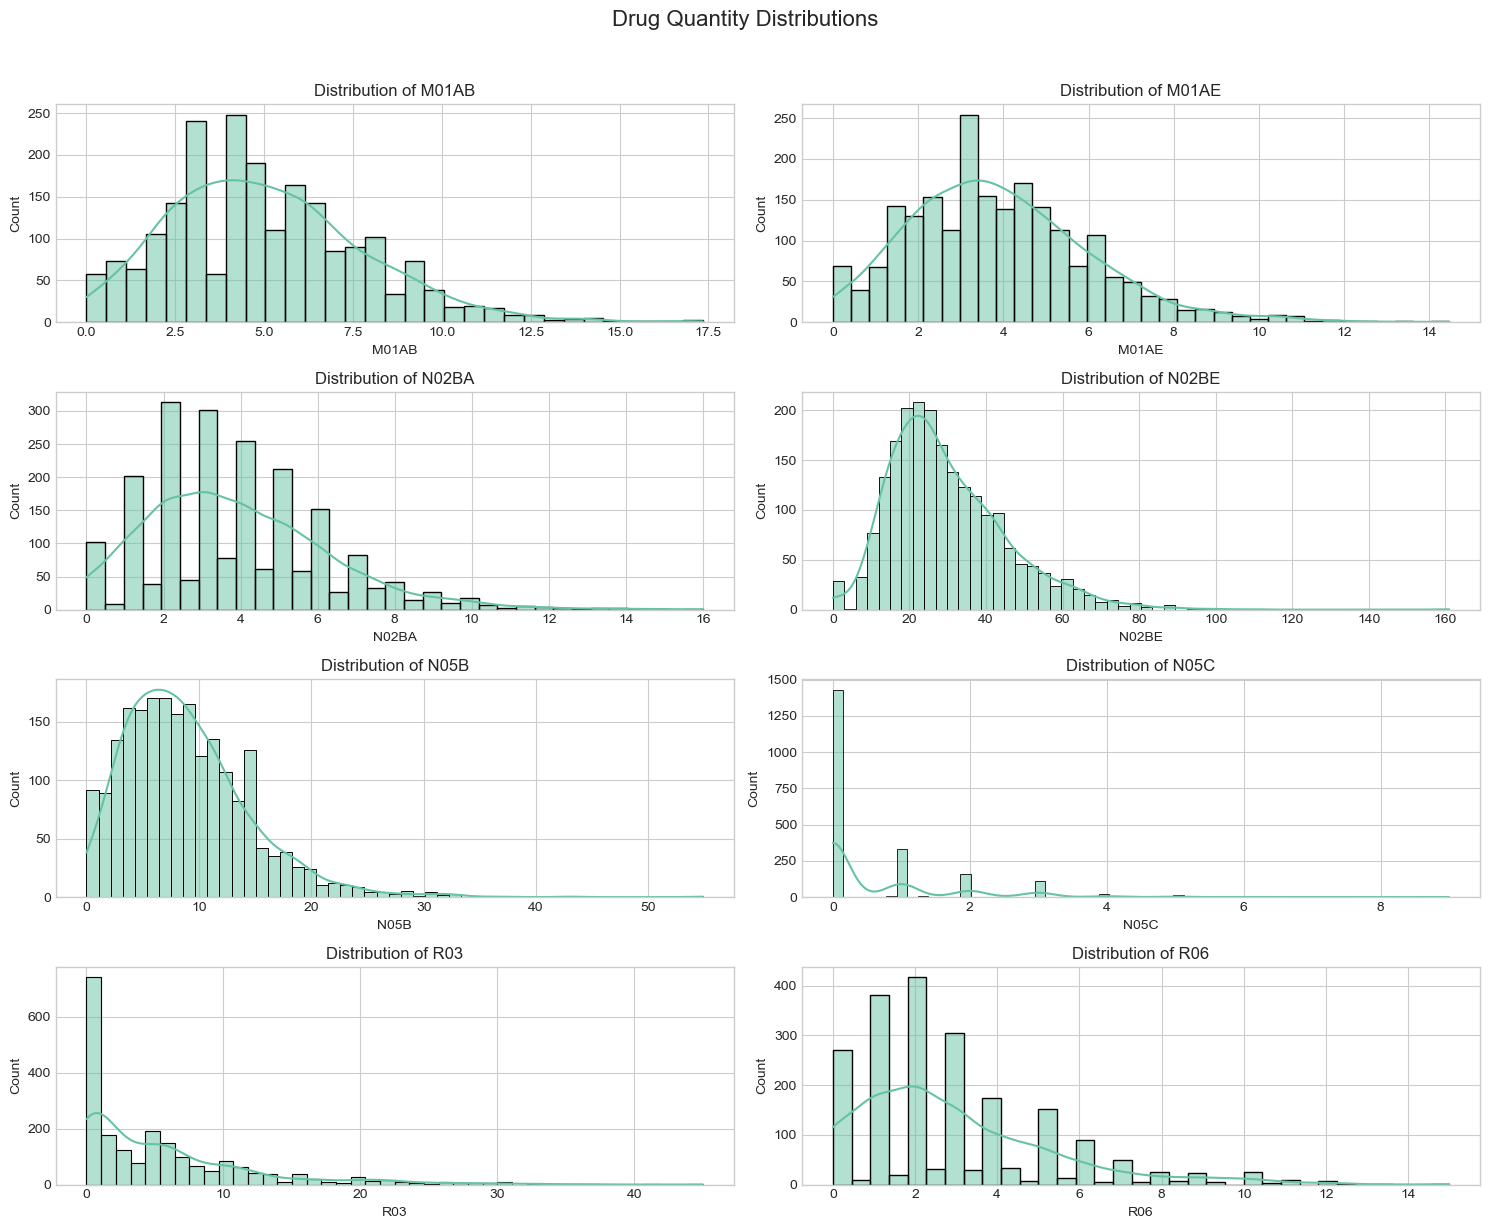

In [14]:
# Distribution of each drug quantity
plt.figure(figsize=(15, 12))
for i, drug in enumerate(drug_columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[drug], kde=True)
    plt.title(f'Distribution of {drug}')
plt.suptitle('Drug Quantity Distributions', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
# Example of bivariate analysis - scatter plot matrix
# For a smaller subset of features to keep visualization manageable
if len(numeric_cols) >= 2:
    # Select a subset of numeric columns (first 4 or fewer)
    subset_cols = numeric_cols[:min(4, len(numeric_cols))]
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[subset_cols], diag_kind='kde')
    plt.suptitle('Pairplot of Numeric Features', y=1.02)
    plt.tight_layout()
    plt.show()

NameError: name 'numeric_cols' is not defined

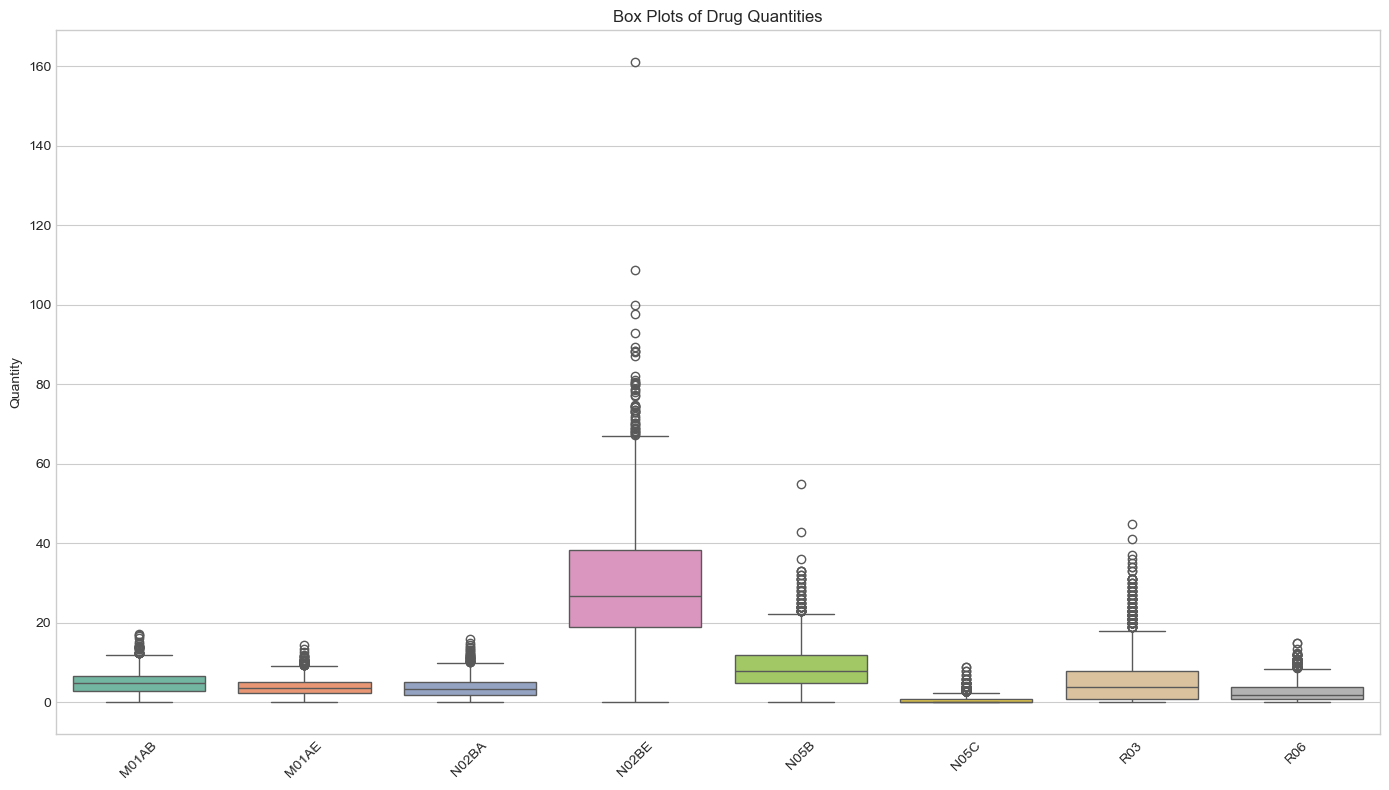

In [16]:
# Box plots for each drug quantity
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[drug_columns])
plt.title('Box Plots of Drug Quantities')
plt.xticks(rotation=45)
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

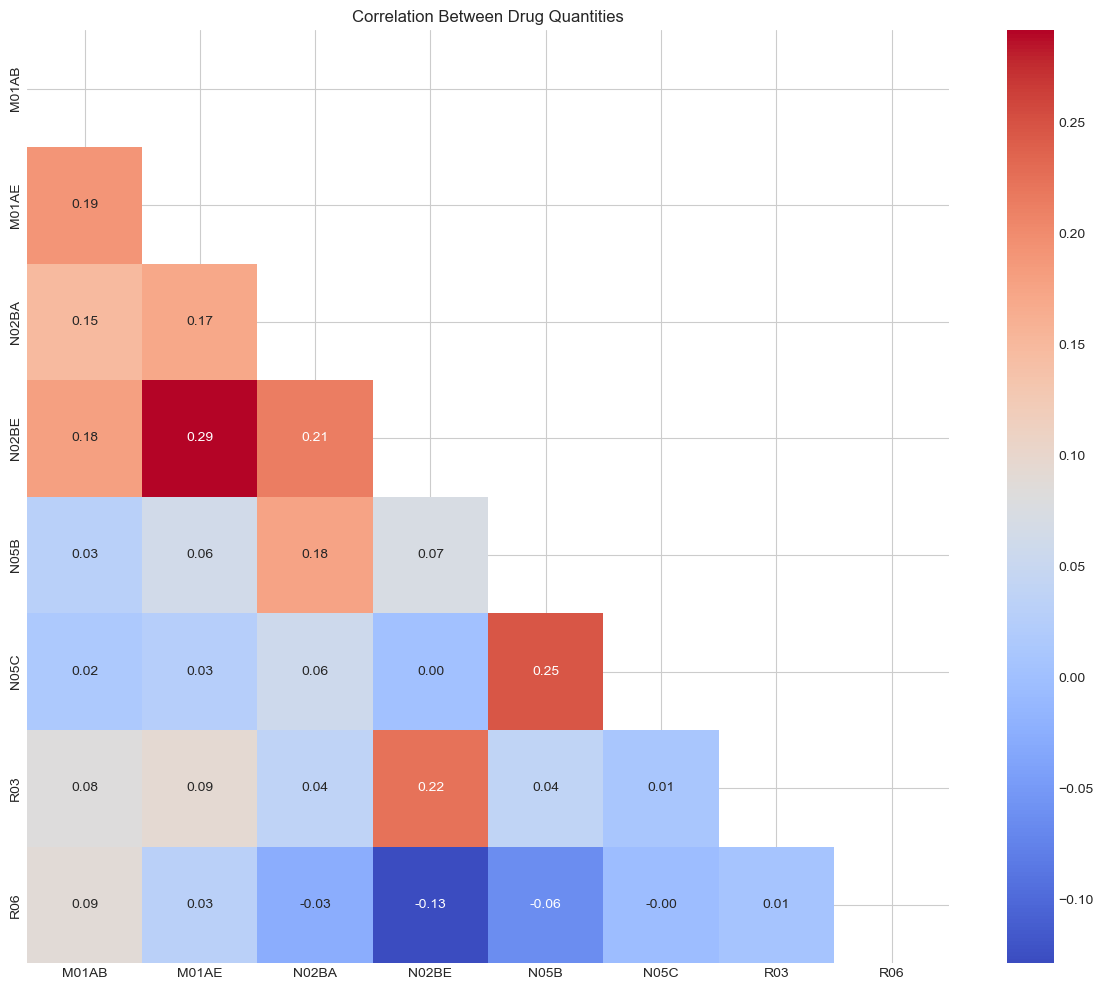

In [17]:
# Correlation between different drug quantities
corr_matrix = df[drug_columns].corr()
plt.figure(figsize=(12, 10))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Drug Quantities')
plt.tight_layout()
plt.show()

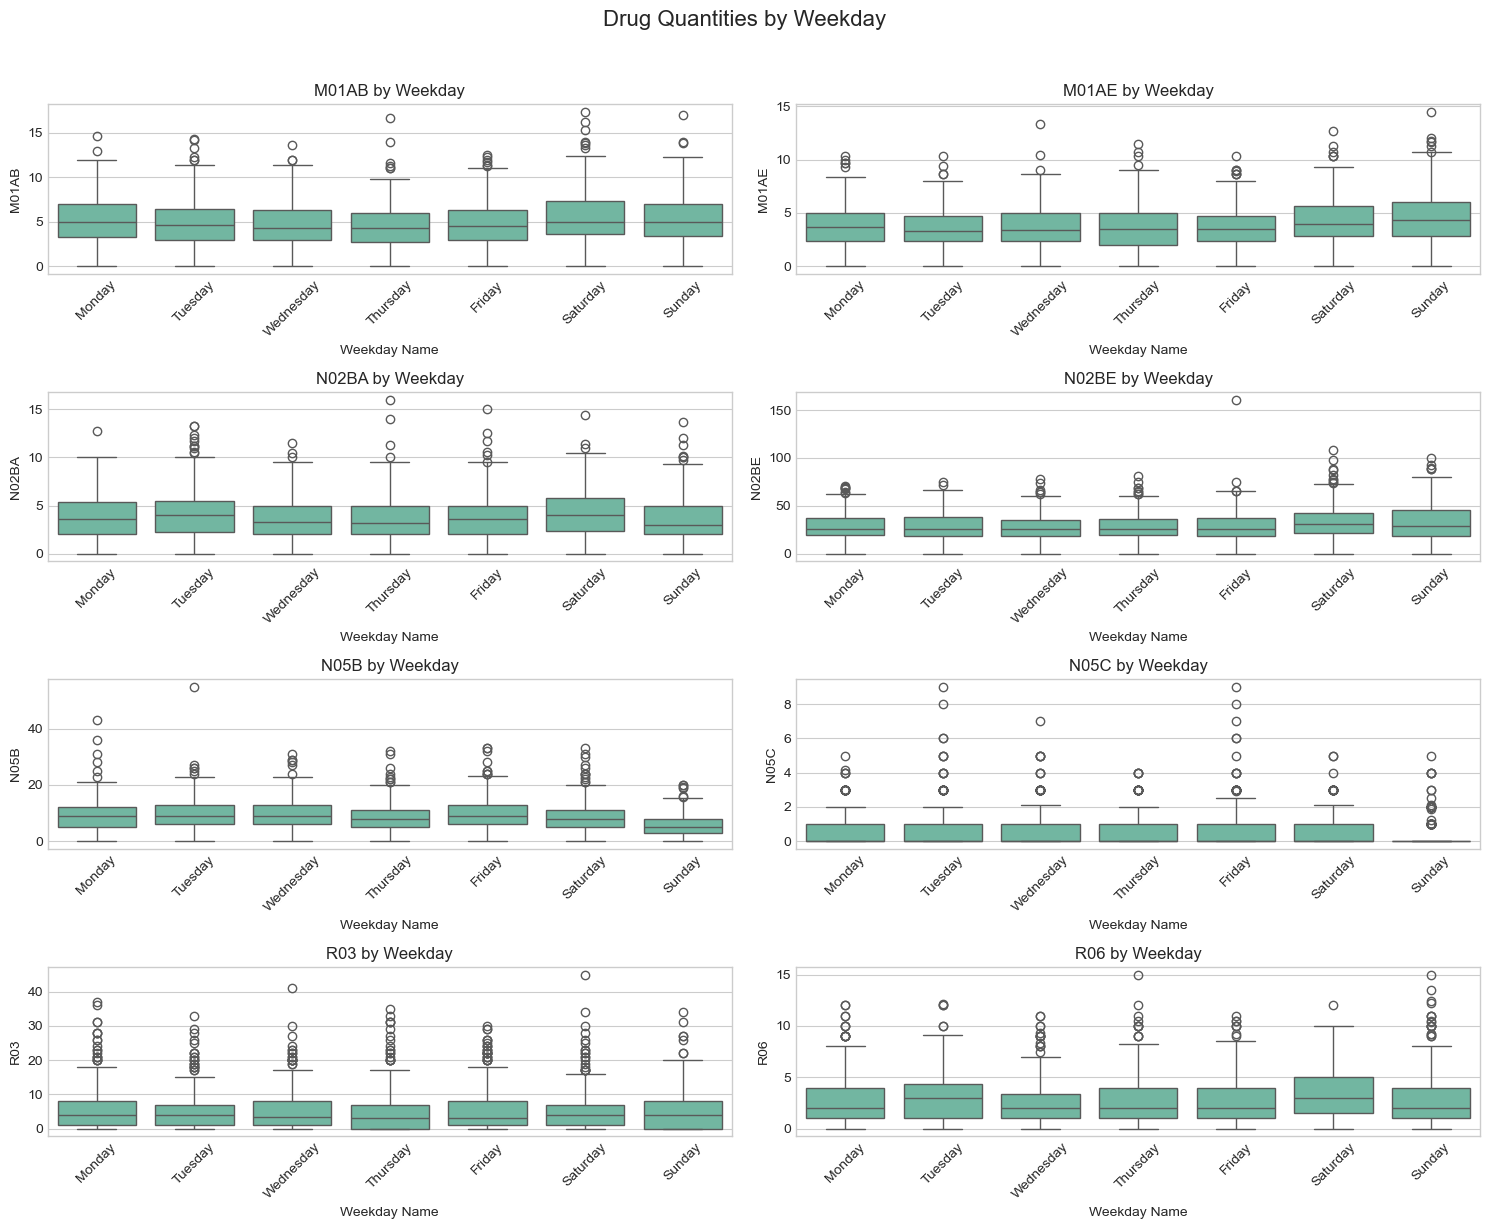

In [18]:
# Weekday analysis if weekday information is available
if 'Weekday Name' in df.columns:
    # Define weekday order
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Check if we have the abbreviated or full weekday names
    sample_weekday = df['Weekday Name'].iloc[0] if not df['Weekday Name'].empty else ""
    if len(sample_weekday) <= 3:  # Abbreviated
        weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    # Plot drug quantities by weekday
    plt.figure(figsize=(15, 12))
    for i, drug in enumerate(drug_columns, 1):
        plt.subplot(4, 2, i)
        try:
            sns.boxplot(x='Weekday Name', y=drug, data=df, order=weekday_order)
            plt.title(f'{drug} by Weekday')
            plt.xticks(rotation=45)
        except:
            print(f"Could not create weekday plot for {drug}")
    plt.suptitle('Drug Quantities by Weekday', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

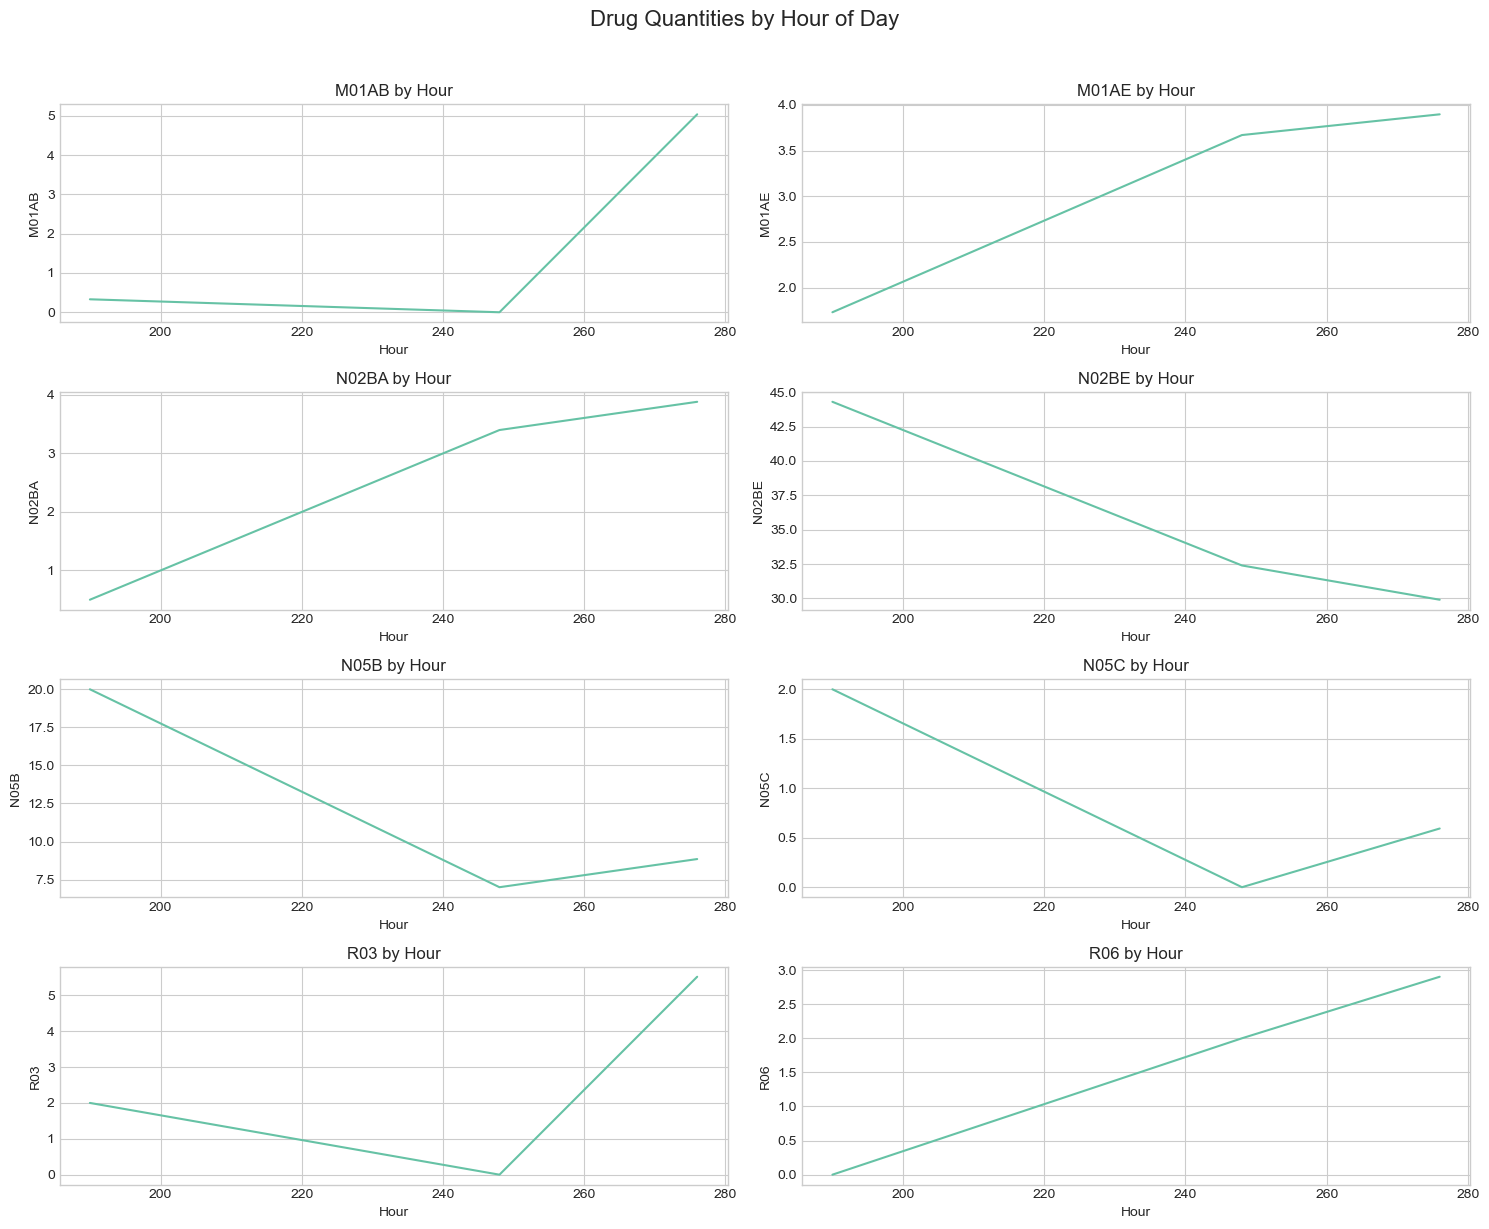

In [19]:
# Hour analysis if hour information is available
if 'Hour' in df.columns:
    # Plot drug quantities by hour
    plt.figure(figsize=(15, 12))
    for i, drug in enumerate(drug_columns, 1):
        plt.subplot(4, 2, i)
        sns.lineplot(x='Hour', y=drug, data=df, errorbar=None)
        plt.title(f'{drug} by Hour')
    plt.suptitle('Drug Quantities by Hour of Day', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

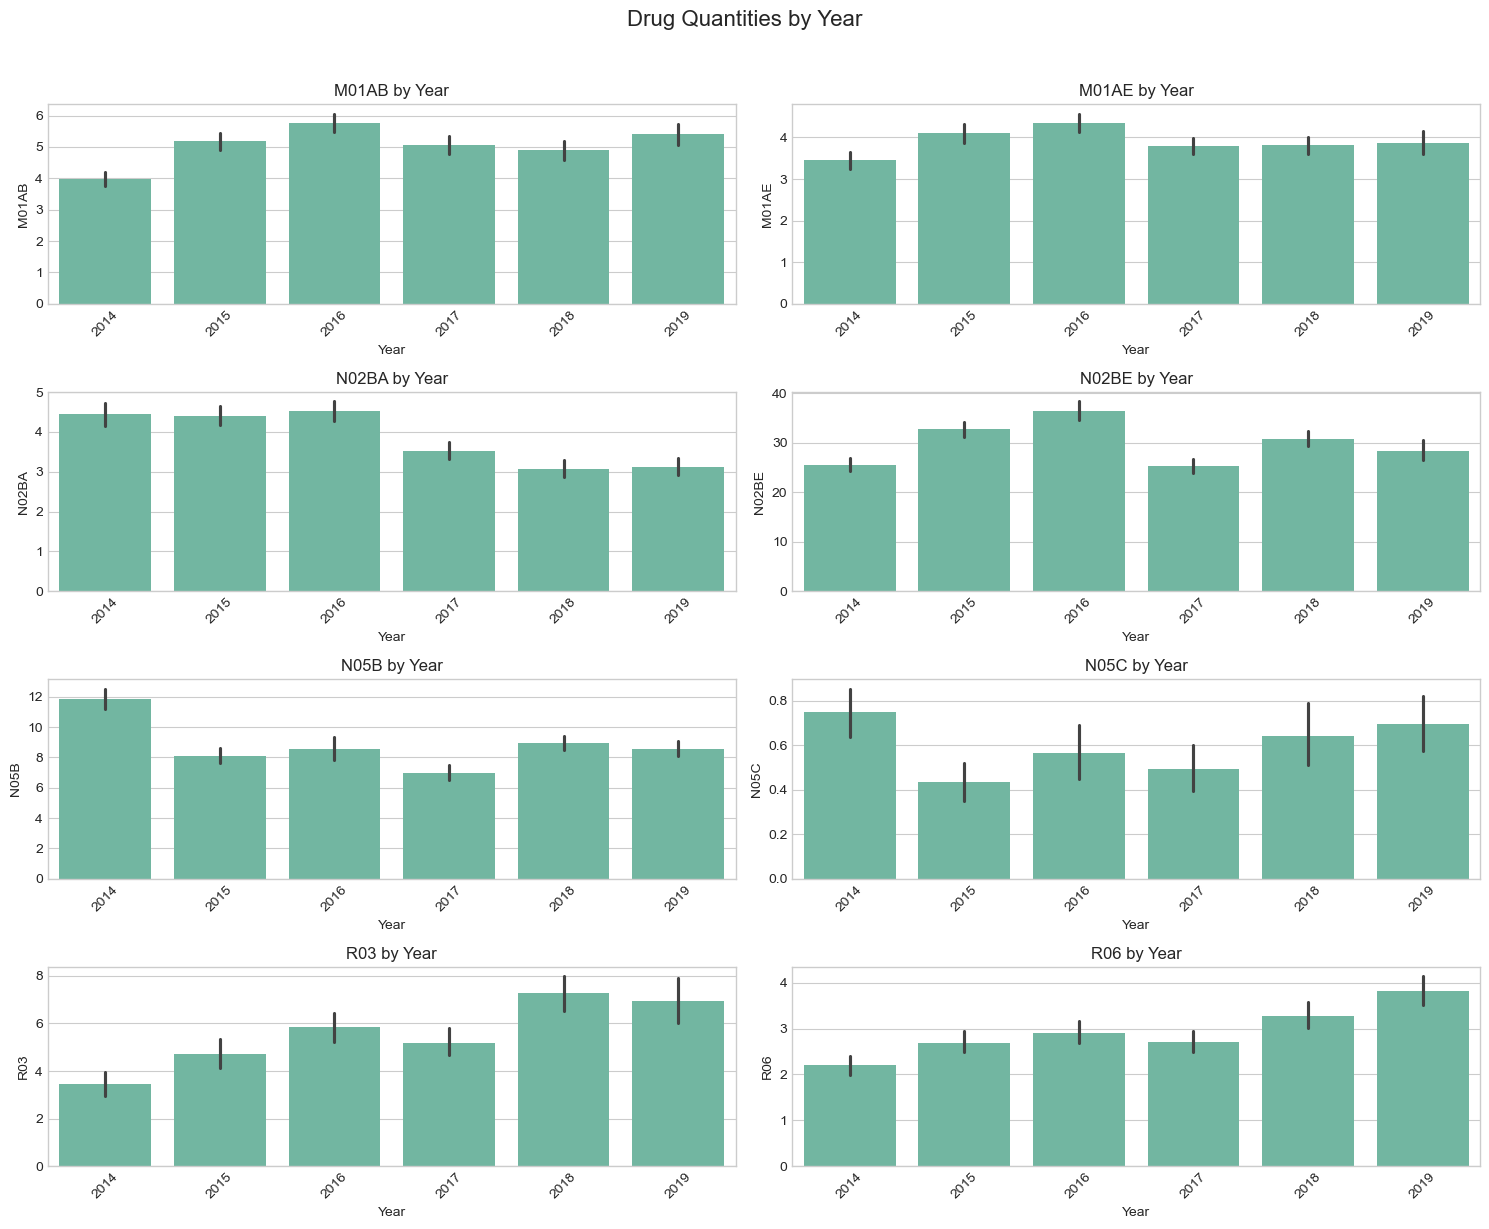

In [20]:
# Year-over-Year analysis
if 'Year' in df.columns:
    # Plot drug quantities by year
    plt.figure(figsize=(15, 12))
    for i, drug in enumerate(drug_columns, 1):
        plt.subplot(4, 2, i)
        sns.barplot(x='Year', y=drug, data=df)
        plt.title(f'{drug} by Year')
        plt.xticks(rotation=45)
    plt.suptitle('Drug Quantities by Year', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

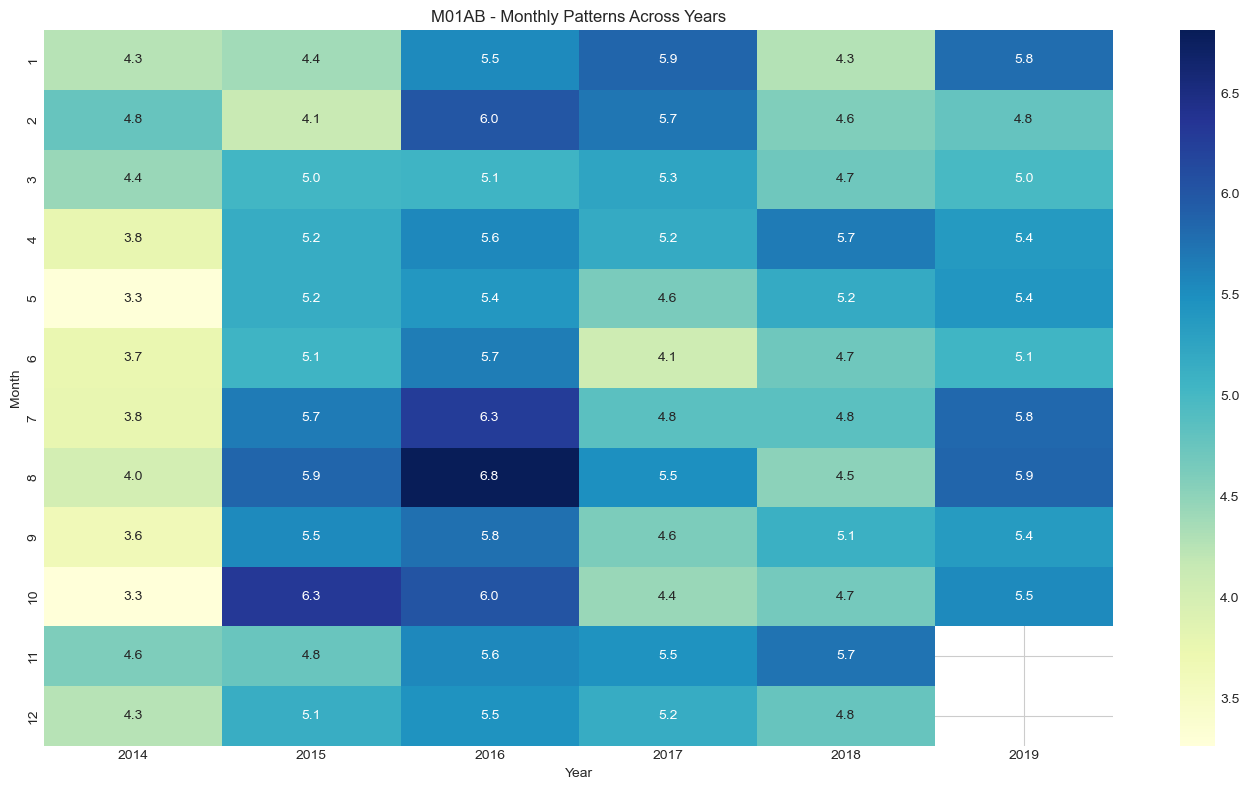

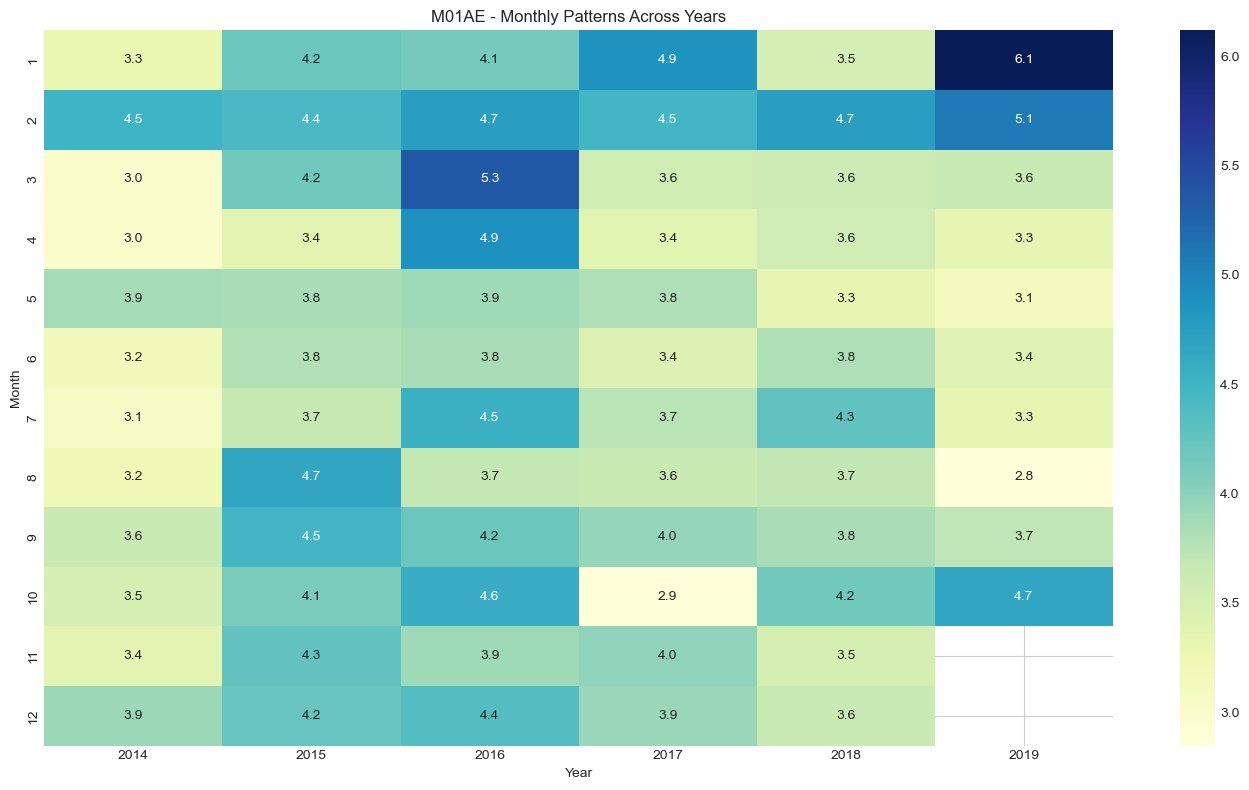

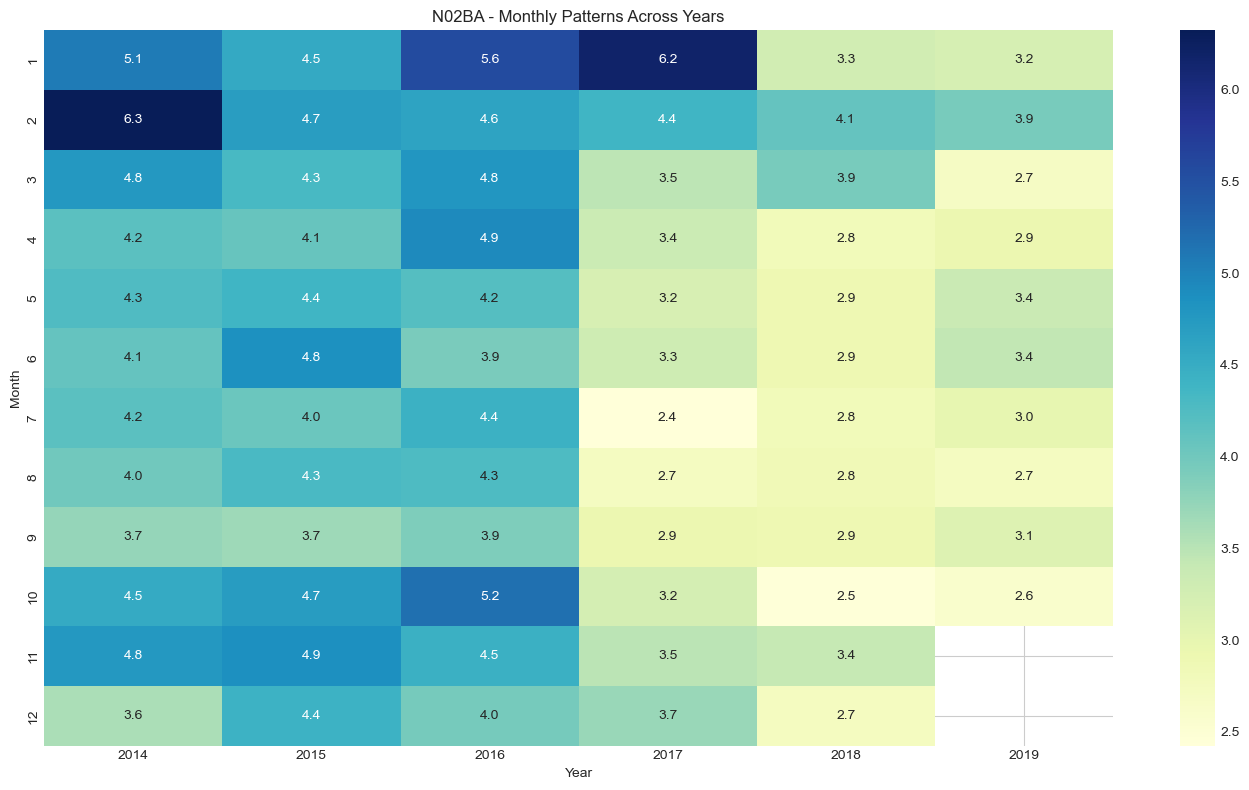

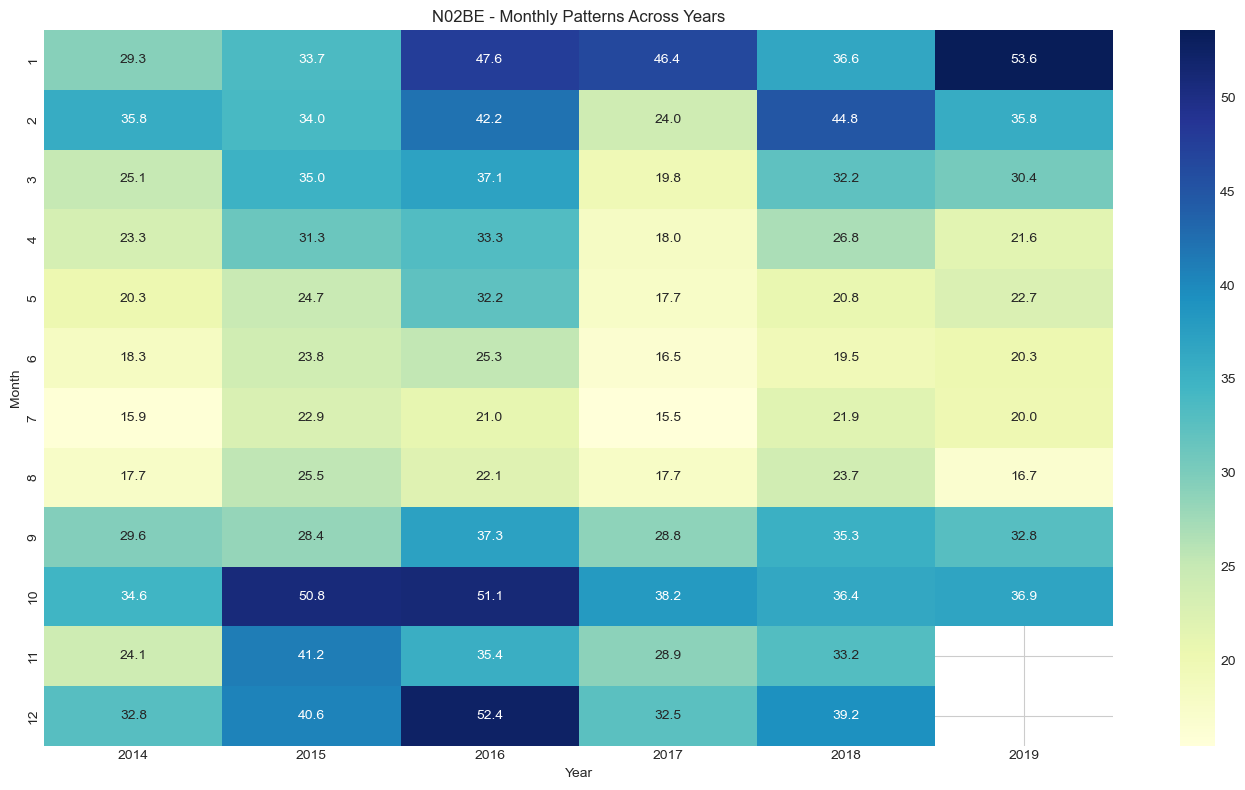

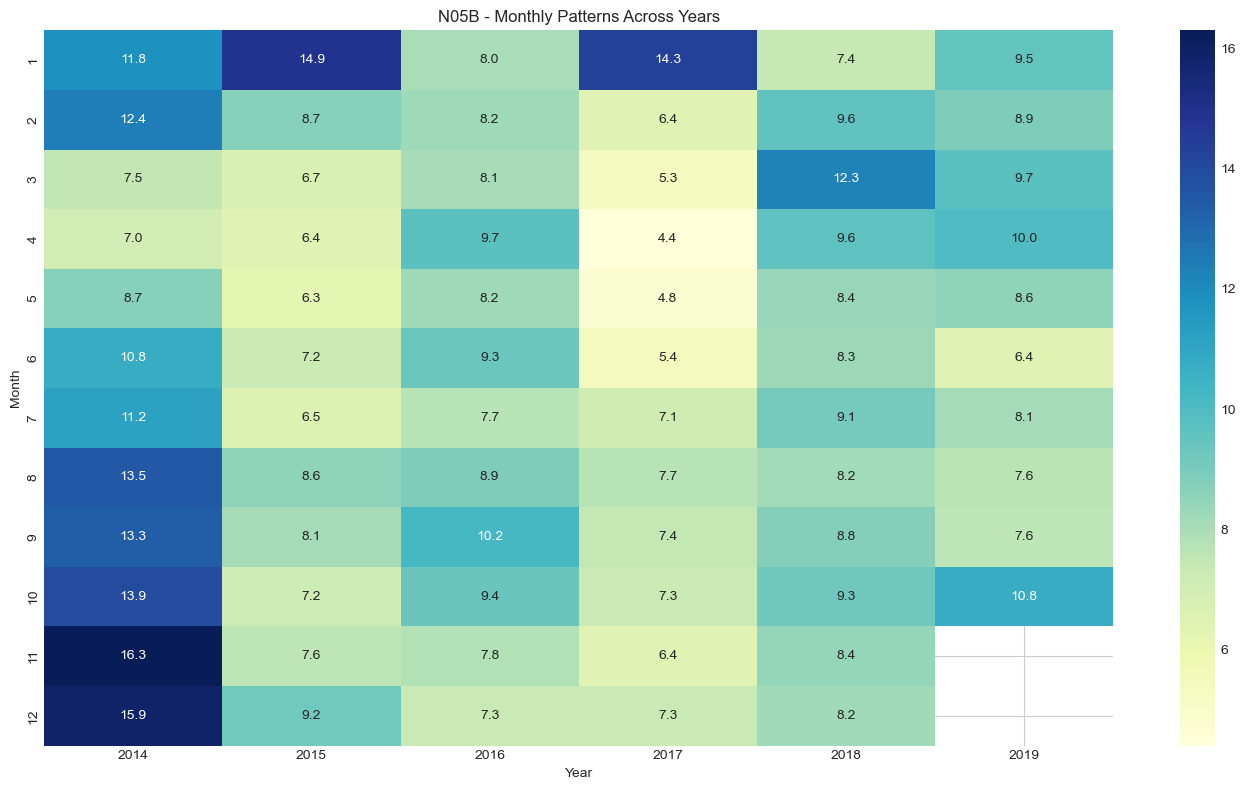

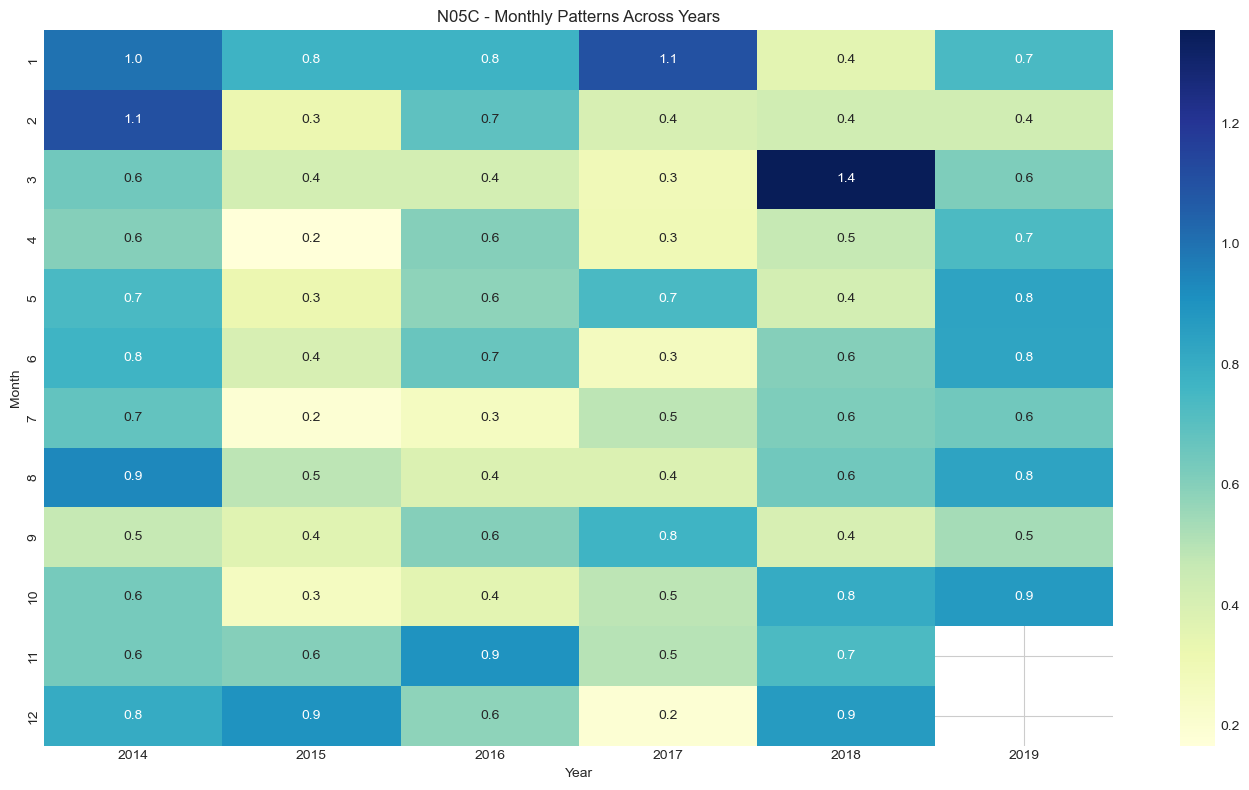

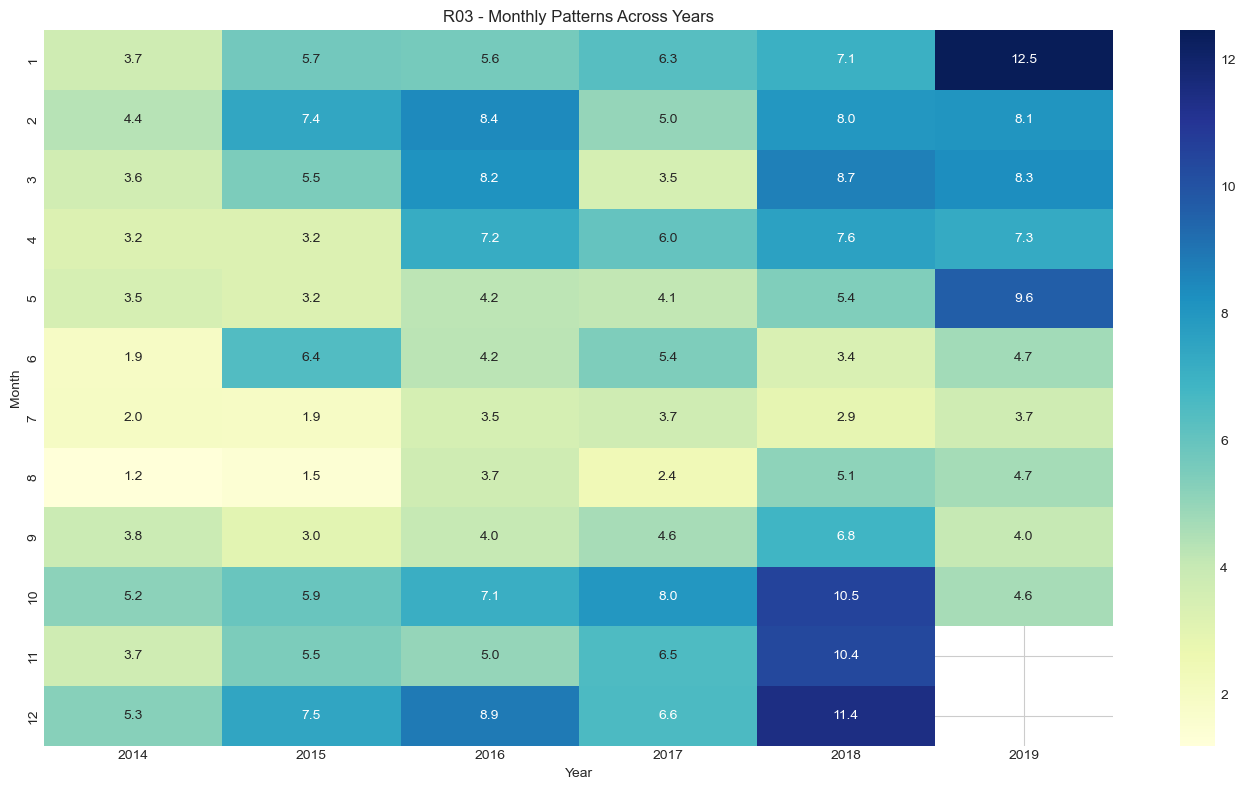

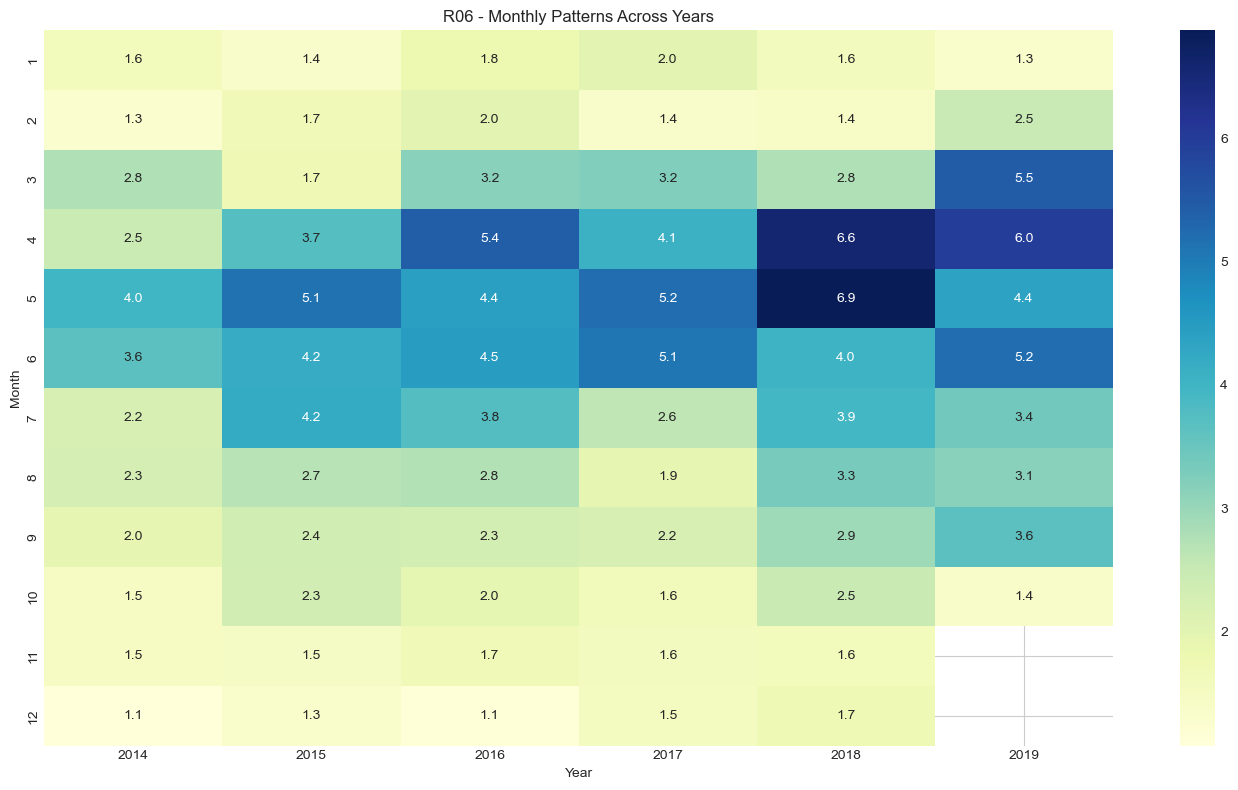

In [21]:
  # Year and Month interaction
if 'Month' in df.columns:
        for drug in drug_columns:
            plt.figure(figsize=(14, 8))
            pivot_data = df.pivot_table(index='Month', columns='Year', values=drug, aggfunc='mean')
            sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.1f')
            plt.title(f'{drug} - Monthly Patterns Across Years')
            plt.tight_layout()
            plt.show()

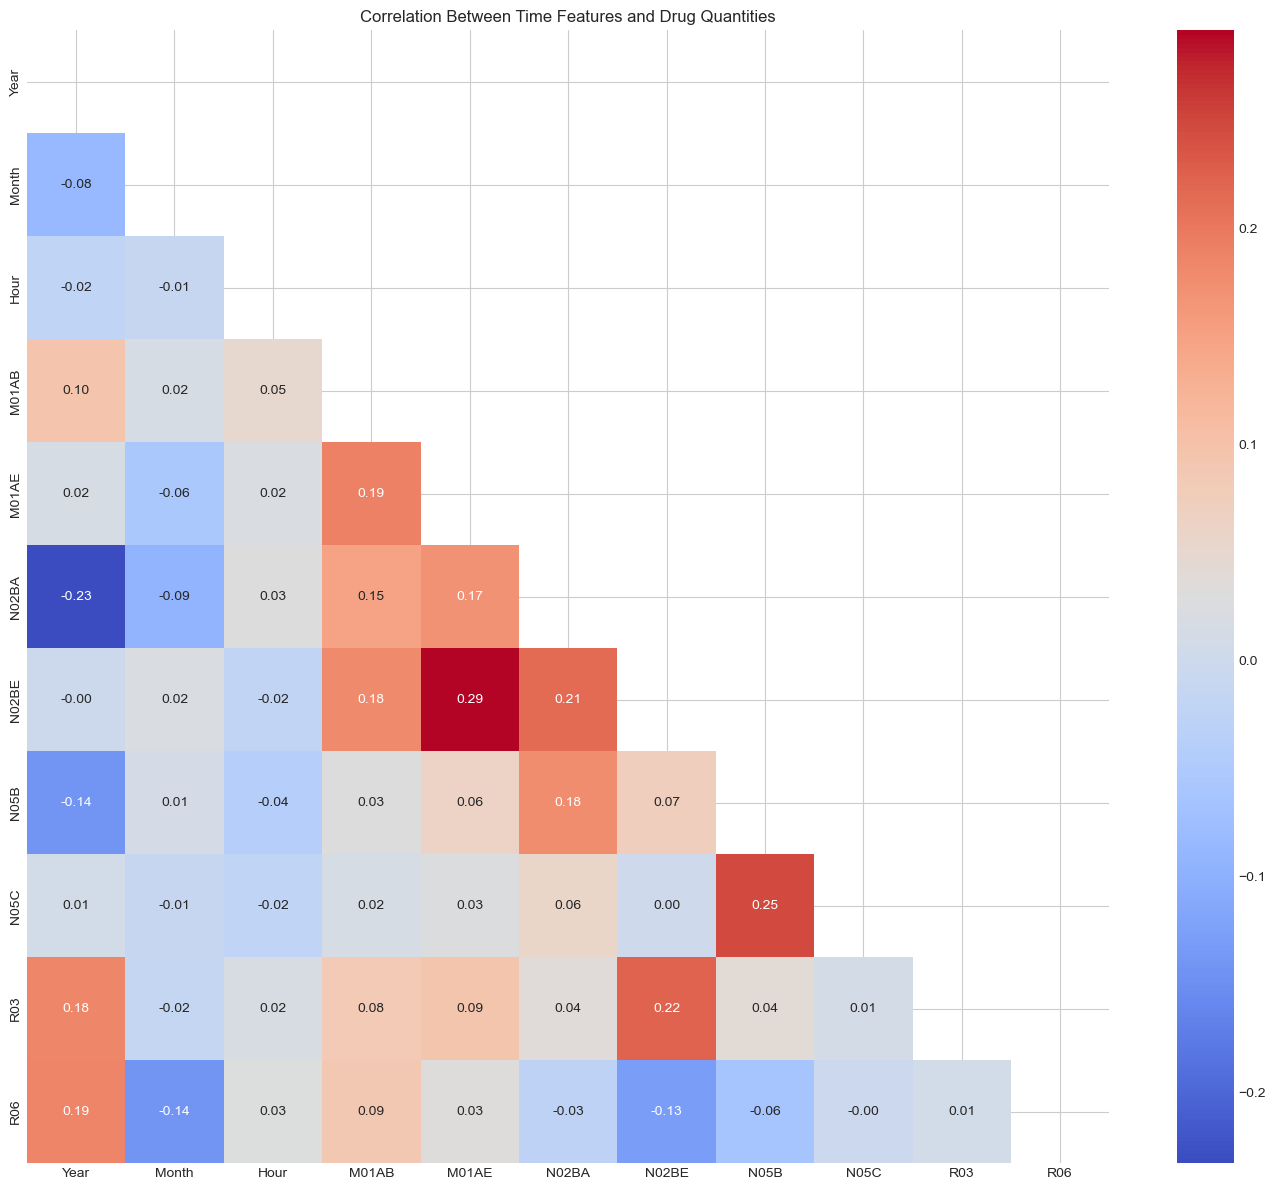

In [22]:
# Find correlations with time features
time_features = [col for col in ['Year', 'Month', 'Hour'] if col in df.columns]
if time_features:
    corr_cols = time_features + drug_columns
    corr_matrix = df[corr_cols].corr()
    plt.figure(figsize=(14, 12))
    mask = np.triu(corr_matrix)
    sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Between Time Features and Drug Quantities')
    plt.tight_layout()
    plt.show()

In [23]:
# Total drug quantity analysis
df['Total_Quantity'] = df[drug_columns].sum(axis=1)
print("\nTotal Drug Quantity Statistics:")
print(df['Total_Quantity'].describe())



Total Drug Quantity Statistics:
count    2106.000000
mean       60.586659
std        21.561684
min         0.000000
25%        46.446750
50%        58.466500
75%        72.814250
max       198.950000
Name: Total_Quantity, dtype: float64


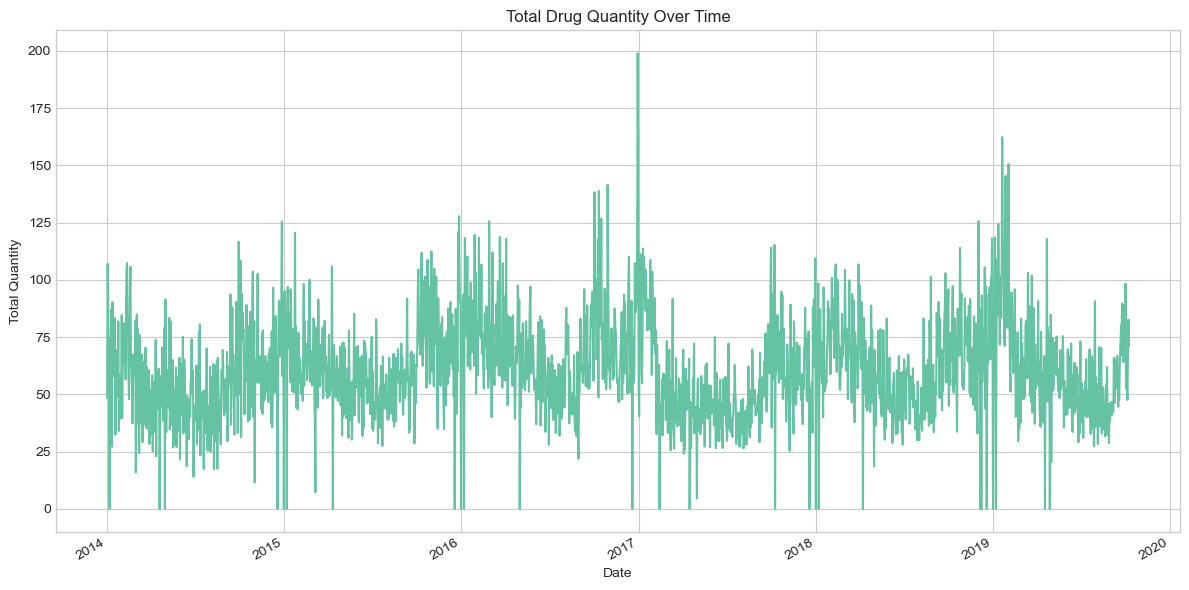

In [24]:
# Plot total quantity over time if date is available
if has_datetime:
    plt.figure(figsize=(12, 6))
    plt.plot(df['datum'], df['Total_Quantity'])
    plt.title('Total Drug Quantity Over Time')
    plt.ylabel('Total Quantity')
    plt.xlabel('Date')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

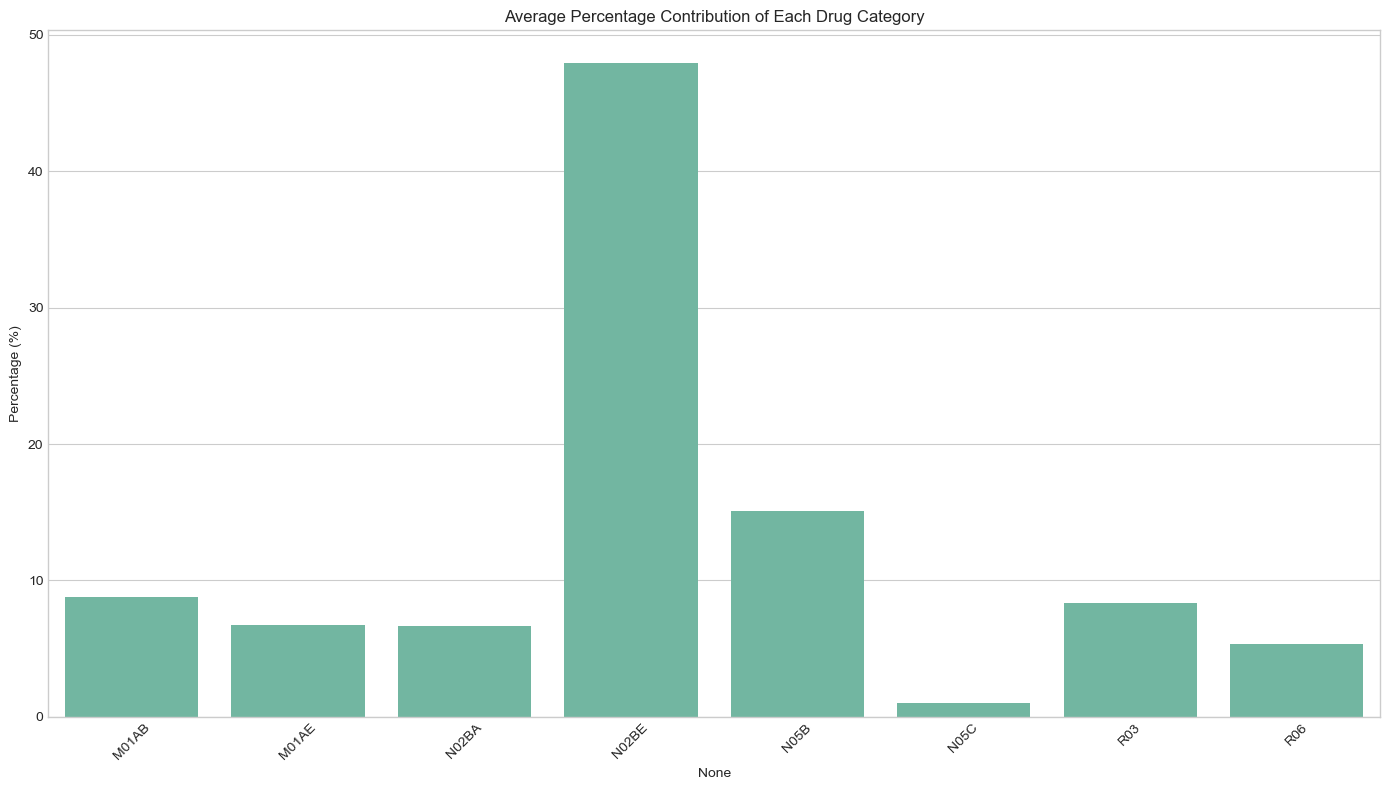

In [25]:
# Percentage contribution of each drug category
for drug in drug_columns:
    df[f'{drug}_Pct'] = df[drug] / df['Total_Quantity'] * 100

# Plot percentage contribution
plt.figure(figsize=(14, 8))
df_pct = df[[f'{drug}_Pct' for drug in drug_columns]].mean()
df_pct.index = [idx.split('_')[0] for idx in df_pct.index]
sns.barplot(x=df_pct.index, y=df_pct.values)
plt.title('Average Percentage Contribution of Each Drug Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
# Detect outliers for each drug quantity
print("\n--- Outlier Detection for Drug Quantities ---")
for drug in drug_columns:
    Q1 = df[drug].quantile(0.25)
    Q3 = df[drug].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[drug] < lower_bound) | (df[drug] > upper_bound)][drug]
    print(f"{drug}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


--- Outlier Detection for Drug Quantities ---


NameError: name 'drug_columns' is not defined

<Figure size 1200x1000 with 0 Axes>

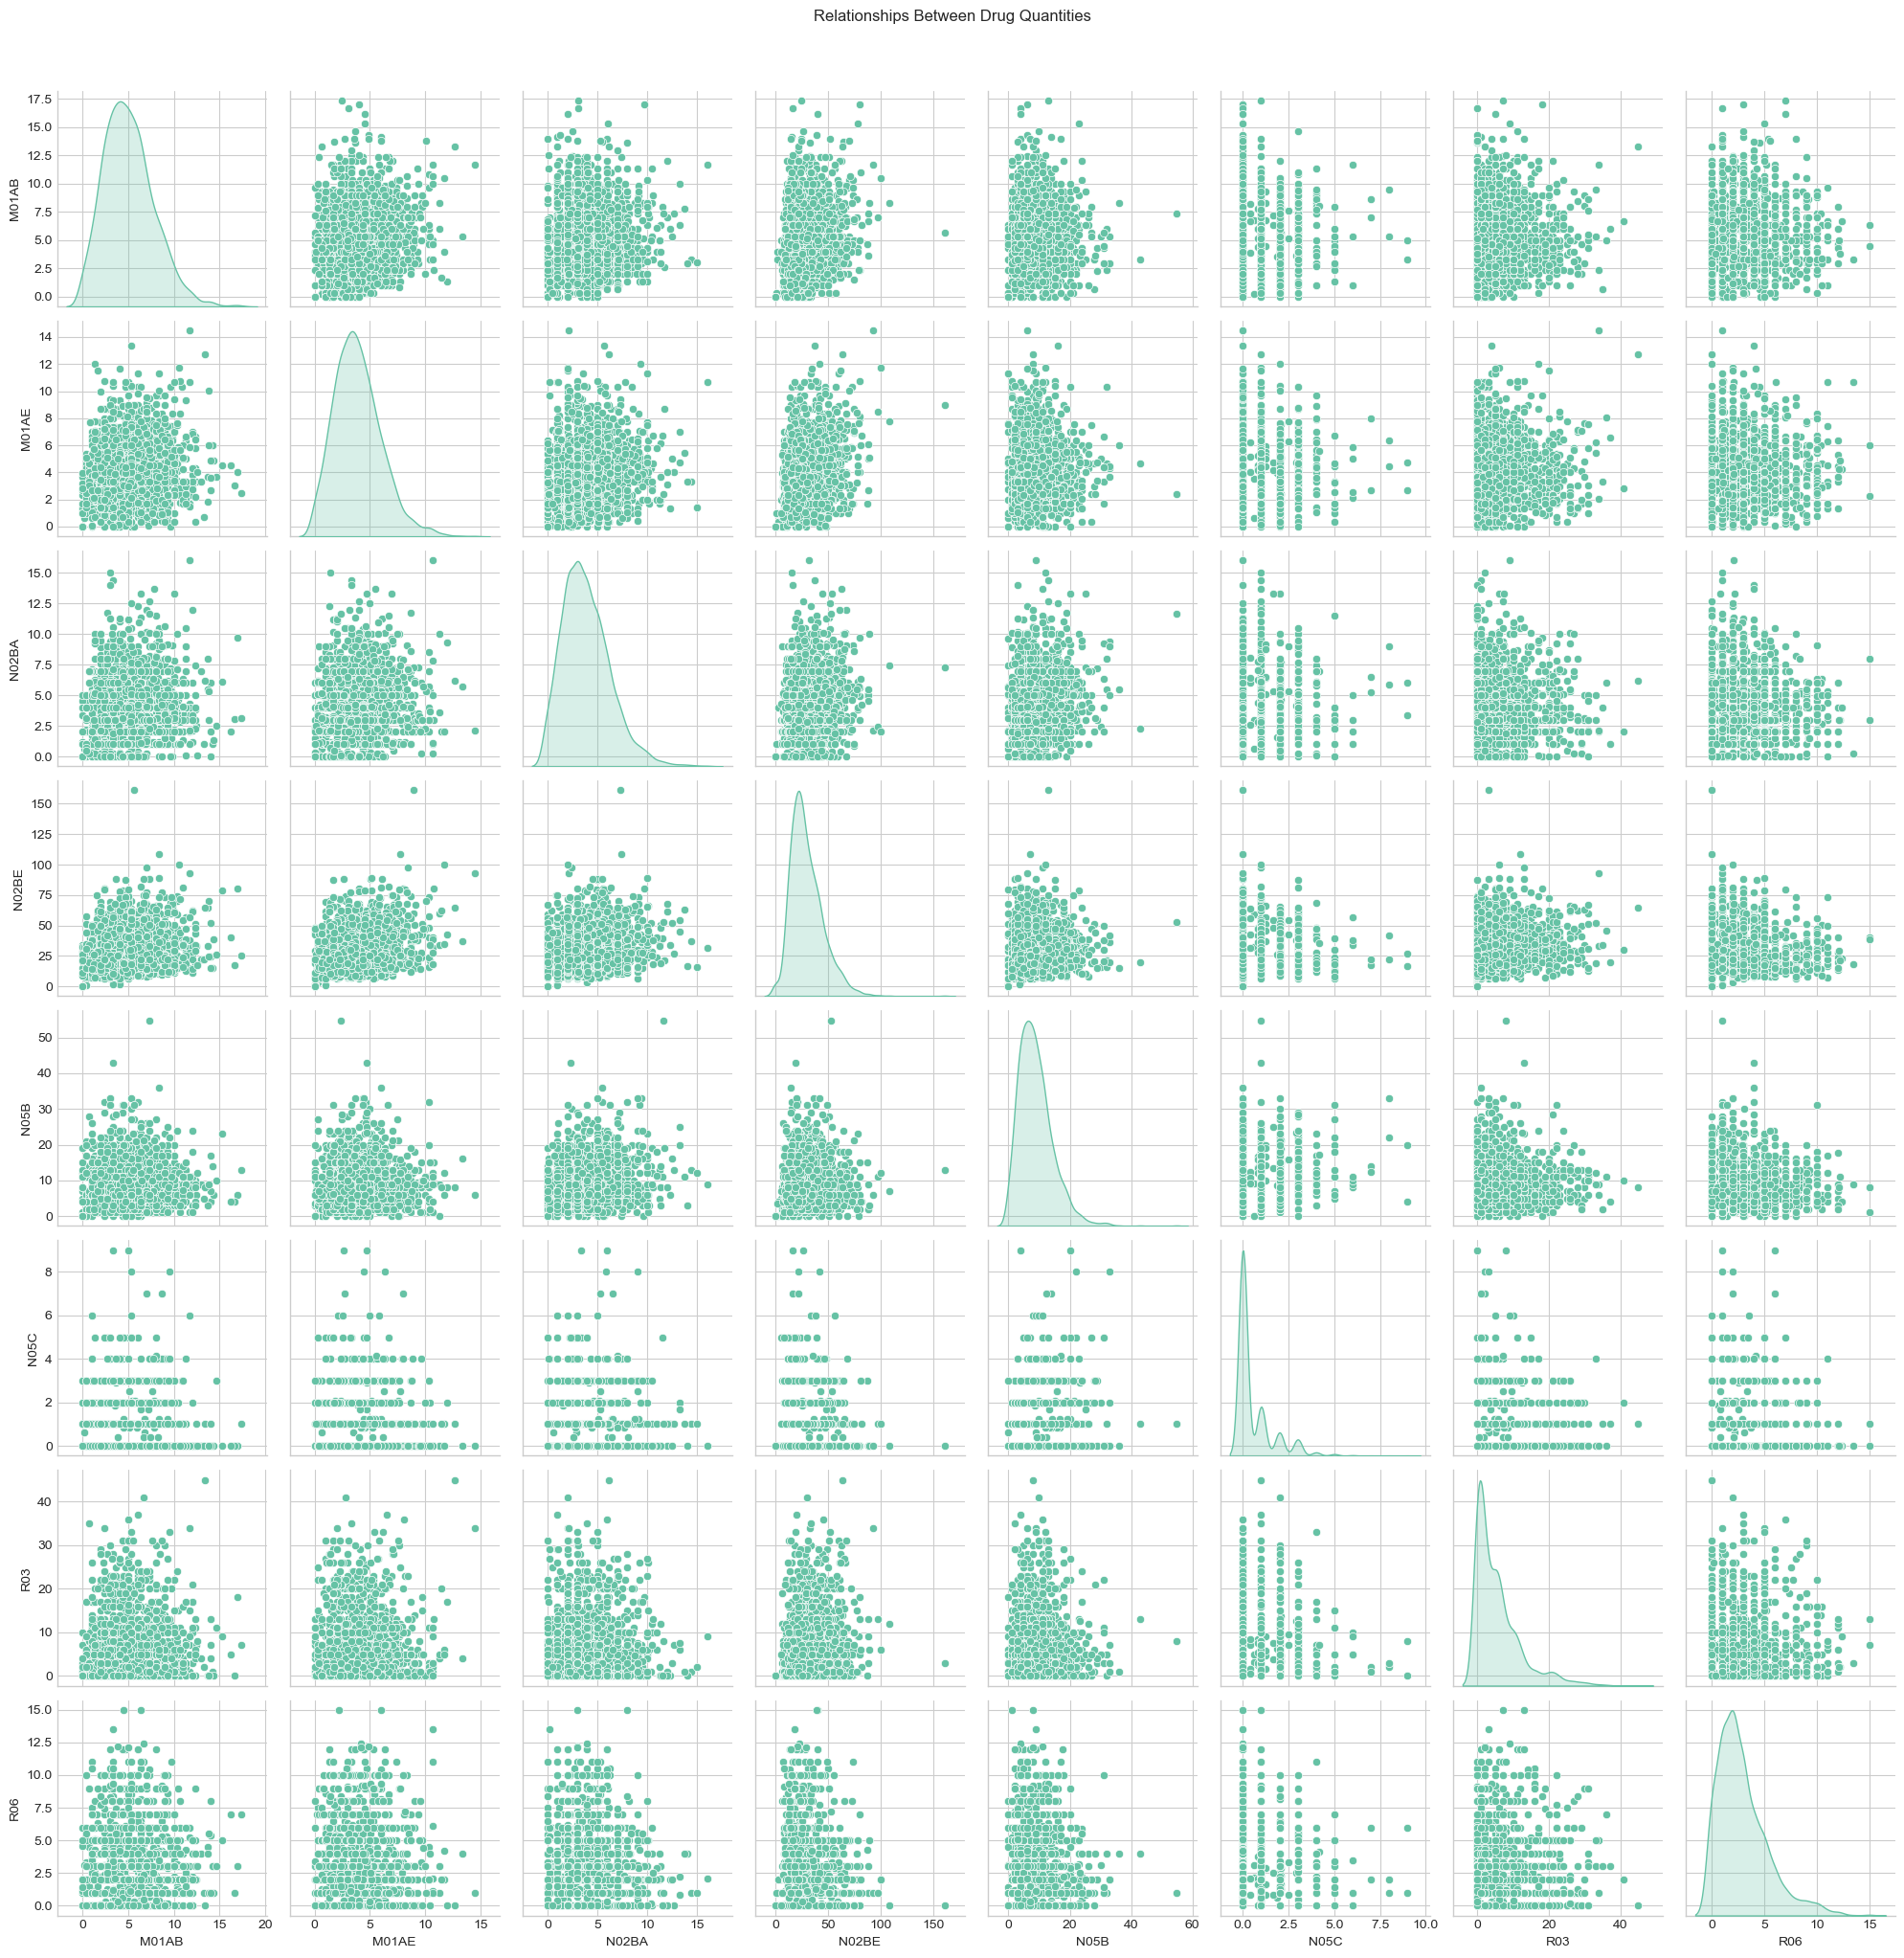


EDA for Drug Demand Prediction Completed!


In [27]:
# Create a pairplot for correlations between drug quantities
plt.figure(figsize=(12, 10))
sns.pairplot(df[drug_columns], diag_kind='kde')
plt.suptitle('Relationships Between Drug Quantities', y=1.02)
plt.tight_layout()
plt.show()

print("\nEDA for Drug Demand Prediction Completed!")